<a href="https://colab.research.google.com/github/brunopdrocha/SNLP_IBMEC/blob/main/2_Bruno_Pil%C3%A3o_Manuten%C3%A7%C3%A3o_preventiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DESAFIO 02 - MANUTENÇÃO PREVENTIVA**

A base que utilizaremos representa dados operacionais de máquinas e a indicação de algum tipo de falha operacional que tenha sido detectado. A base pode carregada [daqui](https://github.com/cassiusf/datasets/raw/refs/heads/main/desafios/Dataset_Manutencao_Preventiva.csv) e o objetivo é prever eventuais situações que levem à parada operacional.


Este conjunto de dados reflete informações relacionadas à manutenção preditiva real encontrada na indústria, possuindo 10.000 registros e 14 variáveis:

- **UDI**: identificador único que varia de 1 a 10.000.
- **product ID**: consistindo em uma letra L, M ou H para baixo (50% de todos os produtos), médio (30%) e alto (20%) como variantes de qualidade do produto e um número de série específico da variante.
- **type**: letra relacionada ao ***product ID***
- **air temperature [K]**: gerada usando um processo de caminhada aleatória posteriormente normalizada para um desvio padrão de 2 K em torno de 300 K.
- **process temperature [K]**: gerada usando um processo de caminhada aleatória normalizado para um desvio padrão de 1 K, adicionado à temperatura do ar mais 10 K.
- **rotational speed [rpm]**: calculada a partir de uma potência de 2860 W, sobreposta com um ruído normalmente distribuído.
- **torque [Nm]**: os valores de torque são normalmente distribuídos em torno de 40 Nm com um Ïƒ = 10 Nm e sem valores negativos.
- **tool wear [min]**: as variantes de qualidade H/M/L adicionam 5/3/2 minutos de desgaste da ferramenta à ferramenta usada no processo. e um
O rótulo "falha da máquina" que indica se a máquina falhou neste ponto de dados específico para qualquer um dos seguintes modos de falha é verdadeiro.
- **machine failure**: rótulo que indica se a máquina falhou neste ponto de dados específico para qualquer um dos modos de falha abaixo.

As falhas consistem em cinco modos de falha independentes

- **Tool Wear Failure (TWF) (Falha de desgaste da ferramenta)**: a ferramenta passa por substituição ou apresenta falha em um tempo de desgaste da ferramenta entre 200 e 240 minutos.
- **Heat Dissipation Failure (HDF) (Falha de dissipação de calor)**: a dissipação de calor causa uma falha no processo, se a diferença entre a temperatura do ar e do processo estiver na faixa de 8.6K e a velocidade de rotação da ferramenta estiver abaixo de 1380 rpm.
- **Power Failure (PWF) (Falha de energia)**: o produto do torque e da velocidade de rotação (em rad/s) é igual à potência necessária para o processo. Se essa potência estiver abaixo de 3500 W ou acima de 9000 W, o processo falhará.
- **Overstrain Failure (OSF) (Falha por sobretensão)**: se o produto do desgaste e torque da ferramenta exceder 11.000 Nm para a variante do produto L, 12.000 para o M e 13.000 para o H, o processo falha devido a sobretensão.
- **Random Failures (RNF) (Falhas aleatórias)**: cada processo tem uma chance de falha de 0,1%, independentemente de seus parâmetros de processo.

Se pelo menos um dos modos de falha acima acontecer, o processo como um todo falhará e o rótulo `machine failure` será definido como 1. Portanto, não é totalmente transparente para o modelo de aprendizado de máquina qual dos modos de falha efetivamente foi responsável pela falha do processo.


## **TAREFA**

Seu objetivo é utilizar um modelo de machine learning rasa para prever a ocorrência de falhas mecânicas.

Utilize um modelo para benchmark diferente do modelo-alvo que decidir usar. Este benchamark será escolhido por você de acordo com o domínio da aplicação e será utilizado como referência a ser batida por seu modelo-alvo, que hipoteticamente será utilizado em produção.

Você deverá fazer todas es etapas necessárias tanto na avaliação dos dados disponíveis quanto na preparação necessária para execução dos modelos escolhidos.

Todas as etapas devem ser documentadas e as escolhas justificadas.

A performance do seu modelo deverá ser avaliada pelas métricas Acurácia, Precision, Recall e/ou F1-Score. Inclua em sua avaliação final de performance Curvas, ROC e/ou Precision-Recall, de acordo com a necessidade e a comparação de performnce entre seu modelo-alvo e o benchmark proposto.

**Está proibido, neste desafio, o uso de qualquer ferramentaque automatize processo, de análise e/ou modelagem. Todo o processo deve ser feito de forma artesanal, pensando em cada etapa e escolhendo o ferramental apropriado, com as devidas justificativas.**

## Visualização inicial


In [ ]:
# De inicio vamos importar todas as bibliotecas para análise de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install -U scikit-learn
!pip install imbalanced-learn


In [ ]:
df = pd.read_csv('https://github.com/cassiusf/datasets/raw/refs/heads/main/desafios/Dataset_Manutencao_Preventiva.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [ ]:
#Vamos realizar uma análise estatistica de nossa base de dados
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [ ]:
# Vamos verificar se possui alguma variavel duplicada na coluna em nosso DataFrame
for col in df.columns:
    print(col,":", df[col].duplicated().sum())


UDI : 0
Product ID : 0
Type : 9997
Air temperature [K] : 9907
Process temperature [K] : 9918
Rotational speed [rpm] : 9059
Torque [Nm] : 9423
Tool wear [min] : 9754
Machine failure : 9998
TWF : 9998
HDF : 9998
PWF : 9998
OSF : 9998
RNF : 9998


In [ ]:
# Com isso não vamos realizar nenhuma remoção das duplicadas e remover as váriaveis de identificador já que não necessárias para predição
df.drop(columns=['UDI', 'Product ID'], inplace=True)

In [ ]:
# Nesta linha vamos verificar se possui dados nulos e os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
 7   TWF                      10000 non-null  int64  
 8   HDF                      10000 non-null  int64  
 9   PWF                      10000 non-null  int64  
 10  OSF                      10000 non-null  int64  
 11  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 937.6+ KB


In [ ]:
# Vamos mapear os tipos de maquina em 1 , 2 e 3 para poder validar se vale ou não sua utilização para a predição
df['Type'] = df['Type'].map({'L': 1, 'M': 2, 'H': 3})

In [ ]:
# Vamos vizualizar uma amostra com remoção destes dados inicialmente
df.sample(10)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
1813,1,298.1,307.7,1479,45.0,136,0,0,0,0,0,0
4003,1,302.1,311.2,1519,39.3,155,0,0,0,0,0,0
3427,1,301.6,310.6,1562,34.4,162,0,0,0,0,0,0
8244,1,299.0,310.4,1512,38.8,109,0,0,0,0,0,0
8802,1,297.4,308.6,1524,43.1,73,0,0,0,0,0,0
938,1,295.6,306.2,1823,25.8,29,0,0,0,0,0,0
5871,1,301.5,311.1,1469,49.5,107,0,0,0,0,0,0
2932,1,300.9,309.7,1460,42.1,181,0,0,0,0,0,0
6443,1,300.8,310.3,1537,33.3,52,0,0,0,0,0,0
1529,1,298.1,309.0,1557,36.0,56,0,0,0,0,0,0


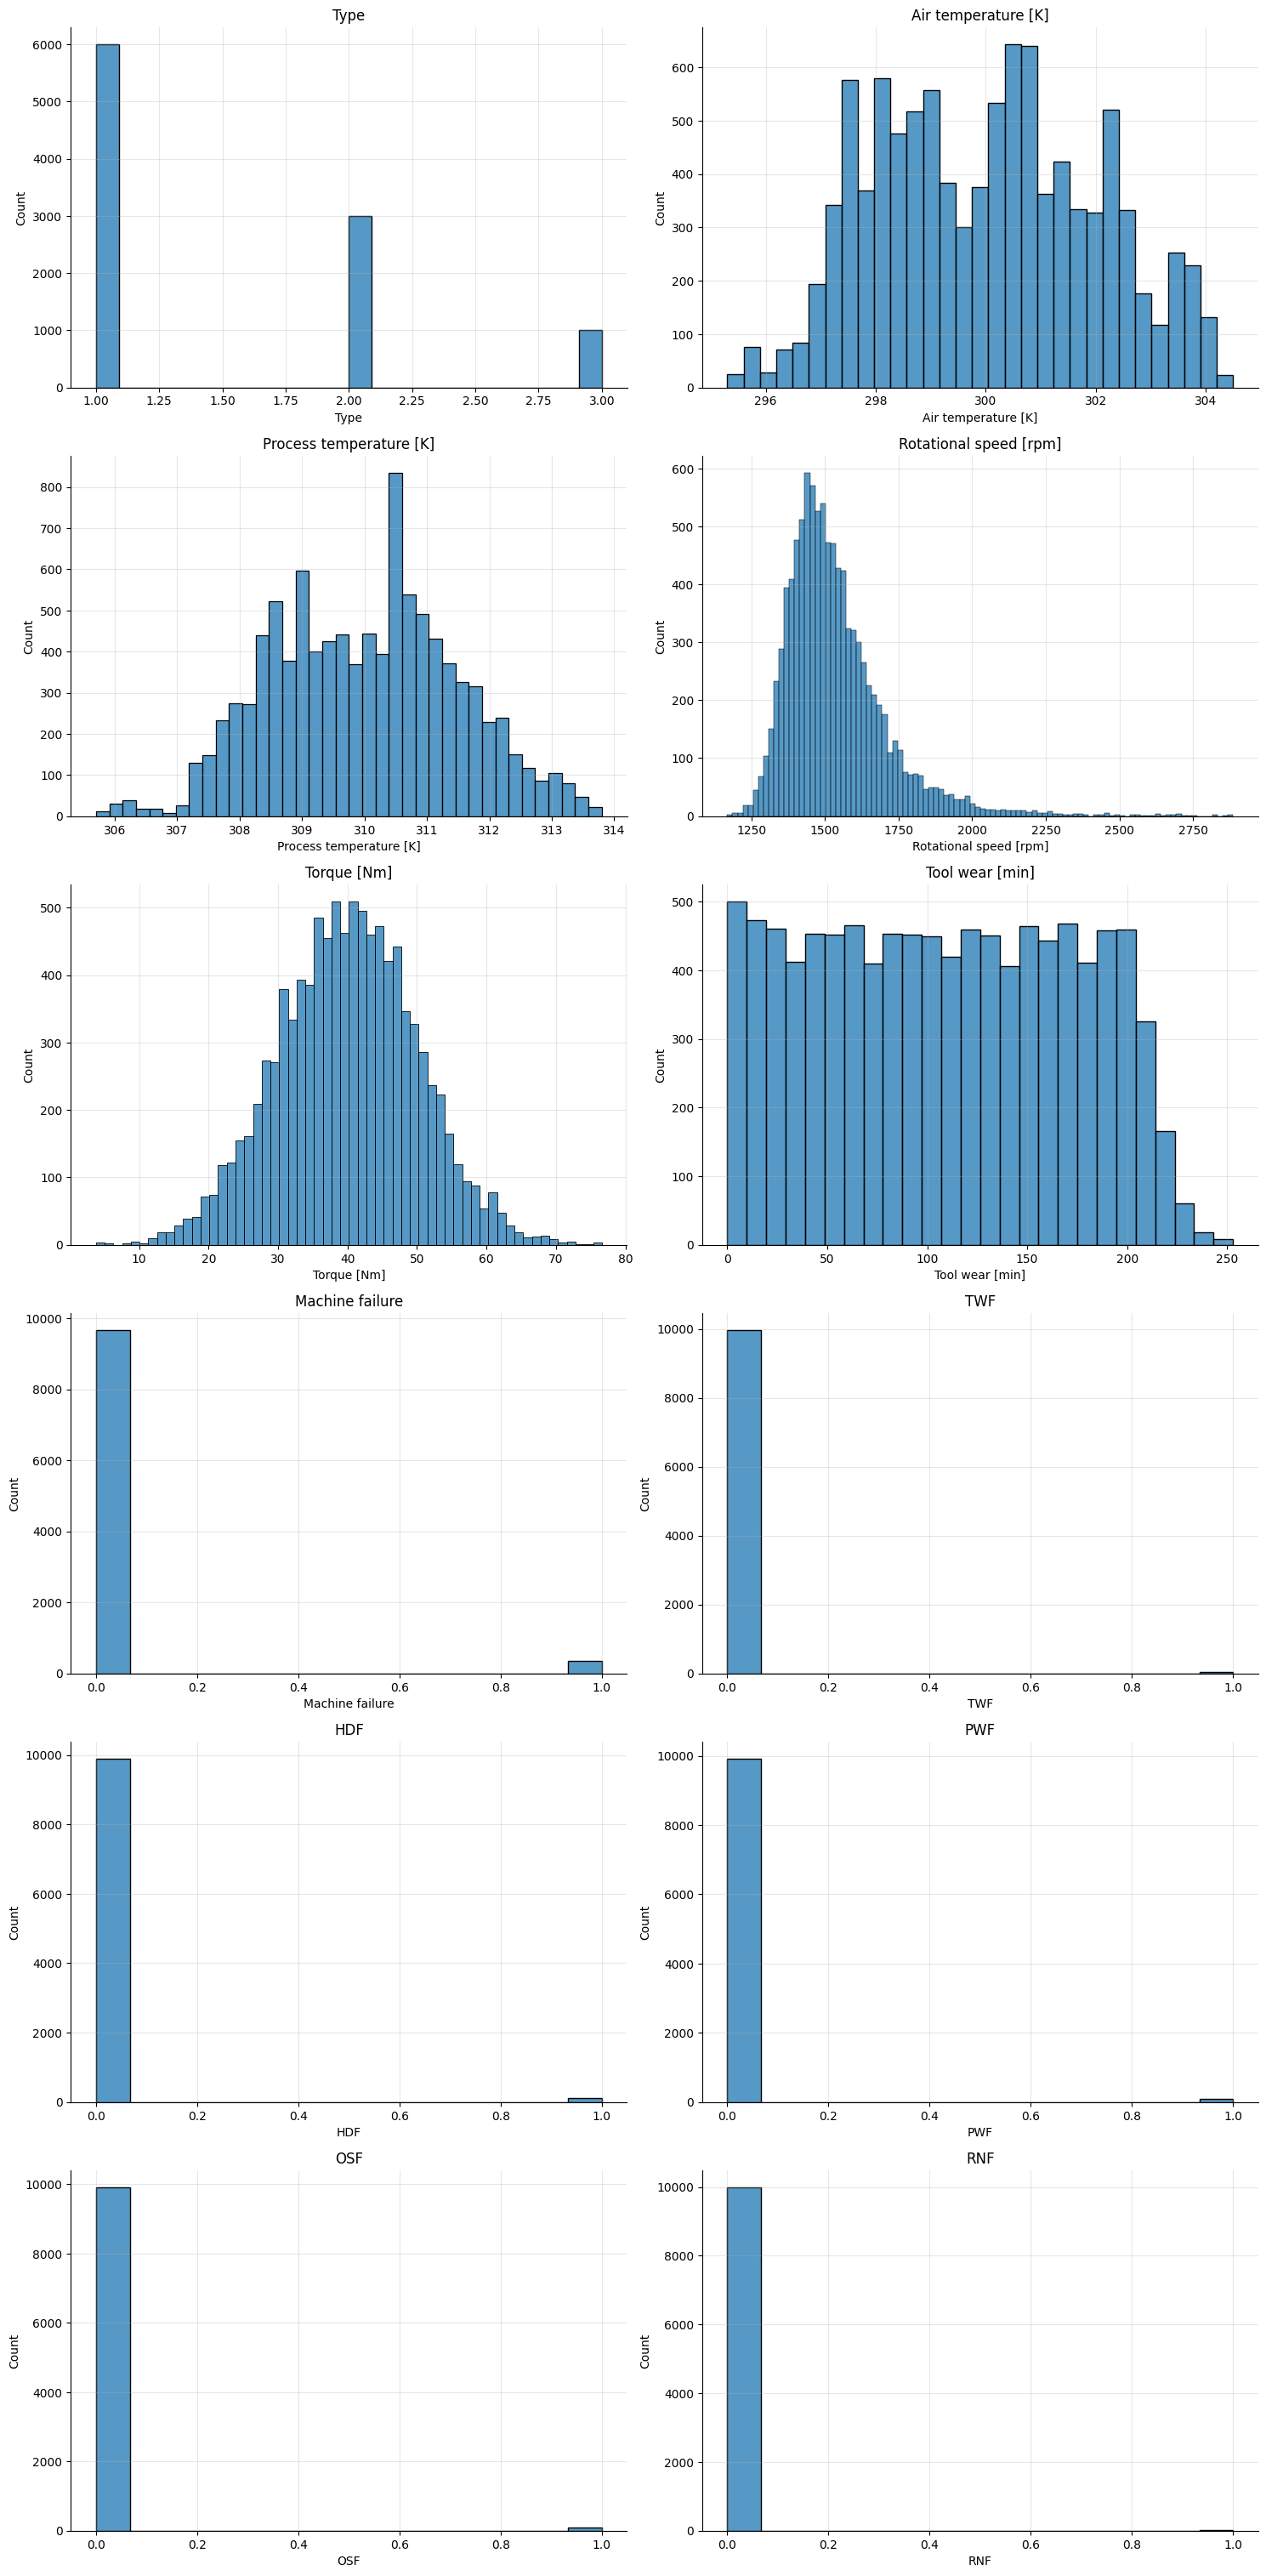

In [ ]:
# Aqui vamos apenas dar uma vizualida base nos nossos dados

# Filtrar colunas excluindo 'UDI'
colunas = [col for col in df.columns]

# Calcular número de linhas dinamicamente
n_linhas = (len(colunas) + 2) // 2  # Arredondamento para cima

# Criar a grade de subplots
fig, axes = plt.subplots(n_linhas, 2, figsize=(15, 5*n_linhas))
ax = axes.flatten()  # Transforma a matriz de eixos em uma lista plana

# Loop pelas colunas
for i, column in enumerate(colunas):
    # Plotar no subplot correspondente
    sns.histplot(df[column], ax=ax[i])
    ax[i].set_title(column, fontsize=12)
    ax[i].grid(alpha=0.3)

    # Remover bordas desnecessárias
    ax[i].spines[['top', 'right']].set_visible(False)

# Esconder eixos vazios restantes
for j in range(len(colunas), len(ax)):
    ax[j].set_visible(False)

# Ajustar layout
plt.tight_layout()
plt.show()

Observamos ate então que nenhuma várivel com uma distorção gráficas de valores portanto vamos iniciar nossa análise para visualizar quais variáveis devemos remover

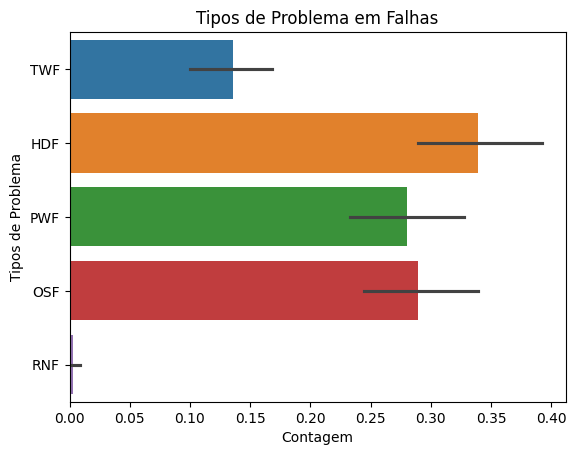


Quantidade de iten analisados :  339


In [ ]:
# Vamos inicialmente avaliar quantos dados de fato possuem machine failure com base nos tipos de problemas (TWF,HDF,PWF,OSF,RNF)
falhas = df[df['Machine failure'] == 1]
contagem_falhas = falhas[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']]
sns.barplot(data=contagem_falhas, orient='h')

plt.title('Tipos de Problema em Falhas')
plt.xlabel('Contagem')
plt.ylabel('Tipos de Problema')
plt.show()

# Quantidade de items analisados
print()
print("Quantidade de iten analisados : ", len(falhas))

## Análise dos dados - EDA



In [ ]:
# Criacao de Classe para analise

from pandas.api.types import is_numeric_dtype
class DataFrameAnalyzer:
    def __init__(self, df):
        """
        Inicializa a classe com o DataFrame fornecido.

        Args:
          df: DataFrame de entrada.
        """
        self.df = df

    def variaveis_constantes(self):
        """
        Identifica variáveis constantes no DataFrame.

        Returns:
          Lista de nomes de colunas com valores constantes.
        """
        variaveis_constantes = []
        for col in self.df.columns:
            if self.df[col].nunique() <= 1:
                variaveis_constantes.append(col)
        return variaveis_constantes

    def variaveis_alta_cardinalidade(self, limiar=0.8):
        """
        Identifica variáveis com alta cardinalidade no DataFrame.

        Args:
          limiar: Limiar para alta cardinalidade (padrão 0.8).

        Returns:
          Lista de nomes de colunas com alta cardinalidade.
        """
        variaveis_alta_cardinalidade = []
        for col in self.df.columns:
            if self.df[col].nunique() / len(self.df) >= limiar:
                variaveis_alta_cardinalidade.append(col)
        return variaveis_alta_cardinalidade

    def variaveis_alta_correlacao(self, threshold=0.9):
        """
        Identifica pares de variáveis numéricas que possuem alta correlação.

        Args:
          threshold: Limiar para considerar alta correlação (padrão 0.9).

        Returns:
          Lista de tuplas com pares de variáveis altamente correlacionadas.
        """
        correlacao = self.df.select_dtypes(include=[np.number]).corr()
        pares_correlacionados = []

        for i in range(len(correlacao.columns)):
            for j in range(i):
                if abs(correlacao.iloc[i, j]) > threshold:
                    colname1 = correlacao.columns[i]
                    colname2 = correlacao.columns[j]
                    pares_correlacionados.append((colname1, colname2))

        return pares_correlacionados

    def variaveis_valores_ausentes(self):
        """
        Identifica variáveis com valores ausentes no DataFrame.

        Returns:
          Dicionário com nomes de colunas e a porcentagem de valores ausentes.
        """
        valores_ausentes = self.df.isnull().sum()
        percentuais_ausentes = (valores_ausentes / len(self.df)) * 100
        variaveis_ausentes = percentuais_ausentes[percentuais_ausentes > 0].sort_values(ascending=False)

        return variaveis_ausentes.to_dict()

    def linhas_duplicadas(self):
        """
        Identifica linhas duplicadas no DataFrame.

        Returns:
          Número de linhas duplicadas.
        """
        return self.df.duplicated().sum()

    def variaveis_variancia_zero(self):
        """
        Identifica variáveis com variância zero no DataFrame.

        Returns:
          Lista de nomes de colunas com variância zero.
        """
        variaveis_variancia_zero = []
        for col in self.df.select_dtypes(include=[np.number]).columns:
            if self.df[col].var() == 0:
                variaveis_variancia_zero.append(col)
        return variaveis_variancia_zero

    def alta_quantidade_valores_ausentes(self, threshold=50):
        """
        Identifica variáveis com alta quantidade de valores ausentes no DataFrame.

        Args:
          threshold: Limiar para considerar alta quantidade de valores ausentes (padrão 50%).

        Returns:
          Lista de nomes de colunas com alta quantidade de valores ausentes.
        """
        valores_ausentes = self.df.isnull().sum() / len(self.df) * 100
        return valores_ausentes[valores_ausentes > threshold].index.tolist()

    def variaveis_assimetria(self):
        """
        Identifica variáveis numéricas com alta assimetria (skewness) no DataFrame.

        Returns:
          Dicionário com nomes de colunas e seus respectivos valores de skewness.
        """
        skewness = self.df.select_dtypes(include=[np.number]).apply(lambda x: x.skew()).dropna()
        skewness = skewness[abs(skewness) > 1]  # Considerando alta assimetria se skewness > 1 ou < -1
        return skewness.to_dict()

    def variaveis_mono(self):
        """
        Identifica variáveis monotônicas no DataFrame.

        Returns:
          Lista de nomes de colunas monotônicas.
        """
        monotonic_cols = []
        for col in self.df.select_dtypes(include=[np.number]).columns:
            if self.df[col].is_monotonic_increasing or self.df[col].is_monotonic_decreasing:
                monotonic_cols.append(col)
        return monotonic_cols

    def variaveis_rejeitadas(self):
        """
        Identifica variáveis rejeitadas no DataFrame, como constantes ou com alta quantidade de valores ausentes.

        Returns:
          Lista de nomes de colunas rejeitadas.
        """
        rejeitadas = self.variaveis_constantes()
        rejeitadas += self.alta_quantidade_valores_ausentes()
        return rejeitadas

    def alta_quantidade_infinidades(self):
        """
        Identifica variáveis com alta quantidade de valores infinitos no DataFrame.

        Returns:
          Dicionário com nomes de colunas e a quantidade de valores infinitos.
        """
        infinitos = self.df.replace([np.inf, -np.inf], np.nan)
        num_infinities = infinitos.isnull().sum() - self.df.isnull().sum()
        return num_infinities[num_infinities > 0].to_dict()

    def clusters_alta_correlacao(self, threshold=0.9):
        """
        Identifica agrupamentos de variáveis numéricas com alta correlação no DataFrame.

        Args:
          threshold: Limiar para considerar alta correlação (padrão 0.9).

        Returns:
          Lista de listas de variáveis que estão altamente correlacionadas entre si.
        """
        correlacao = self.df.select_dtypes(include=[np.number]).corr()
        clusters = []
        visited = set()

        for i in range(len(correlacao.columns)):
            cluster = []
            for j in range(i):
                if abs(correlacao.iloc[i, j]) > threshold:
                    colname1 = correlacao.columns[i]
                    colname2 = correlacao.columns[j]
                    if colname1 not in visited and colname2 not in visited:
                        cluster.extend([colname1, colname2])
                        visited.update([colname1, colname2])
            if cluster:
                clusters.append(cluster)

        return clusters

    def resumo_dataset(self):
        """
        Gera um resumo das características do DataFrame.

        Returns:
          Dicionário com informações sobre o DataFrame.
        """
        num_linhas = self.df.shape[0]
        num_colunas = self.df.shape[1]
        variaveis_numericas = [coluna for coluna in self.df.columns if is_numeric_dtype(self.df[coluna])]

        return {
            'Número de linhas': num_linhas,
            'Número de colunas': num_colunas,
            'Variáveis numéricas': variaveis_numericas,
            'Alertas': '-' * 50,
            'Variáveis com valores constantes': self.variaveis_constantes(),
            'Variáveis com alta cardinalidade': self.variaveis_alta_cardinalidade(),
            'Pares de variáveis com alta correlação': self.variaveis_alta_correlacao(),
            'Variáveis com valores ausentes': self.variaveis_valores_ausentes(),
            'Linhas duplicadas': self.linhas_duplicadas(),
            'Variáveis com variância zero': self.variaveis_variancia_zero(),
            'Variáveis com alta quantidade de valores ausentes': self.alta_quantidade_valores_ausentes(),
            'Variáveis com alta assimetria (skewness)': self.variaveis_assimetria(),
            'Variáveis monotônicas': self.variaveis_mono(),
            'Variáveis rejeitadas': self.variaveis_rejeitadas(),
            'Variáveis com alta quantidade de valores infinitos': self.alta_quantidade_infinidades(),
            'Agrupamentos de alta correlação': self.clusters_alta_correlacao()
        }

# Exemplo de uso:
# df = pd.read_csv('seu_arquivo.csv')
# analyzer = DataFrameAnalyzer(df)
# resumo = analyzer.resumo_dataset()

# Print Inteiro
# print (resumo)

# Loop (melhor o de baixo)
# for key, value in resumo.items():
#    print(f"{key}: {value}")



In [ ]:
# Vamos realizar uma análise inicial dos dado
analyzer = DataFrameAnalyzer(df)
resumo = analyzer.resumo_dataset()

for key, value in resumo.items():
    print(f"{key}: {value}")

Número de linhas: 10000
Número de colunas: 12
Variáveis numéricas: ['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']
Alertas: --------------------------------------------------
Variáveis com valores constantes: []
Variáveis com alta cardinalidade: []
Pares de variáveis com alta correlação: []
Variáveis com valores ausentes: {}
Linhas duplicadas: 0
Variáveis com variância zero: []
Variáveis com alta quantidade de valores ausentes: []
Variáveis com alta assimetria (skewness): {'Rotational speed [rpm]': 1.9931710047137523, 'Machine failure': 5.151851785192755, 'TWF': 14.644461804356506, 'HDF': 9.164788742436428, 'PWF': 10.114516252342675, 'OSF': 9.953915634416003, 'RNF': 22.87957015055937}
Variáveis monotônicas: []
Variáveis rejeitadas: []
Variáveis com alta quantidade de valores infinitos: {}
Agrupamentos de alta correlação: []


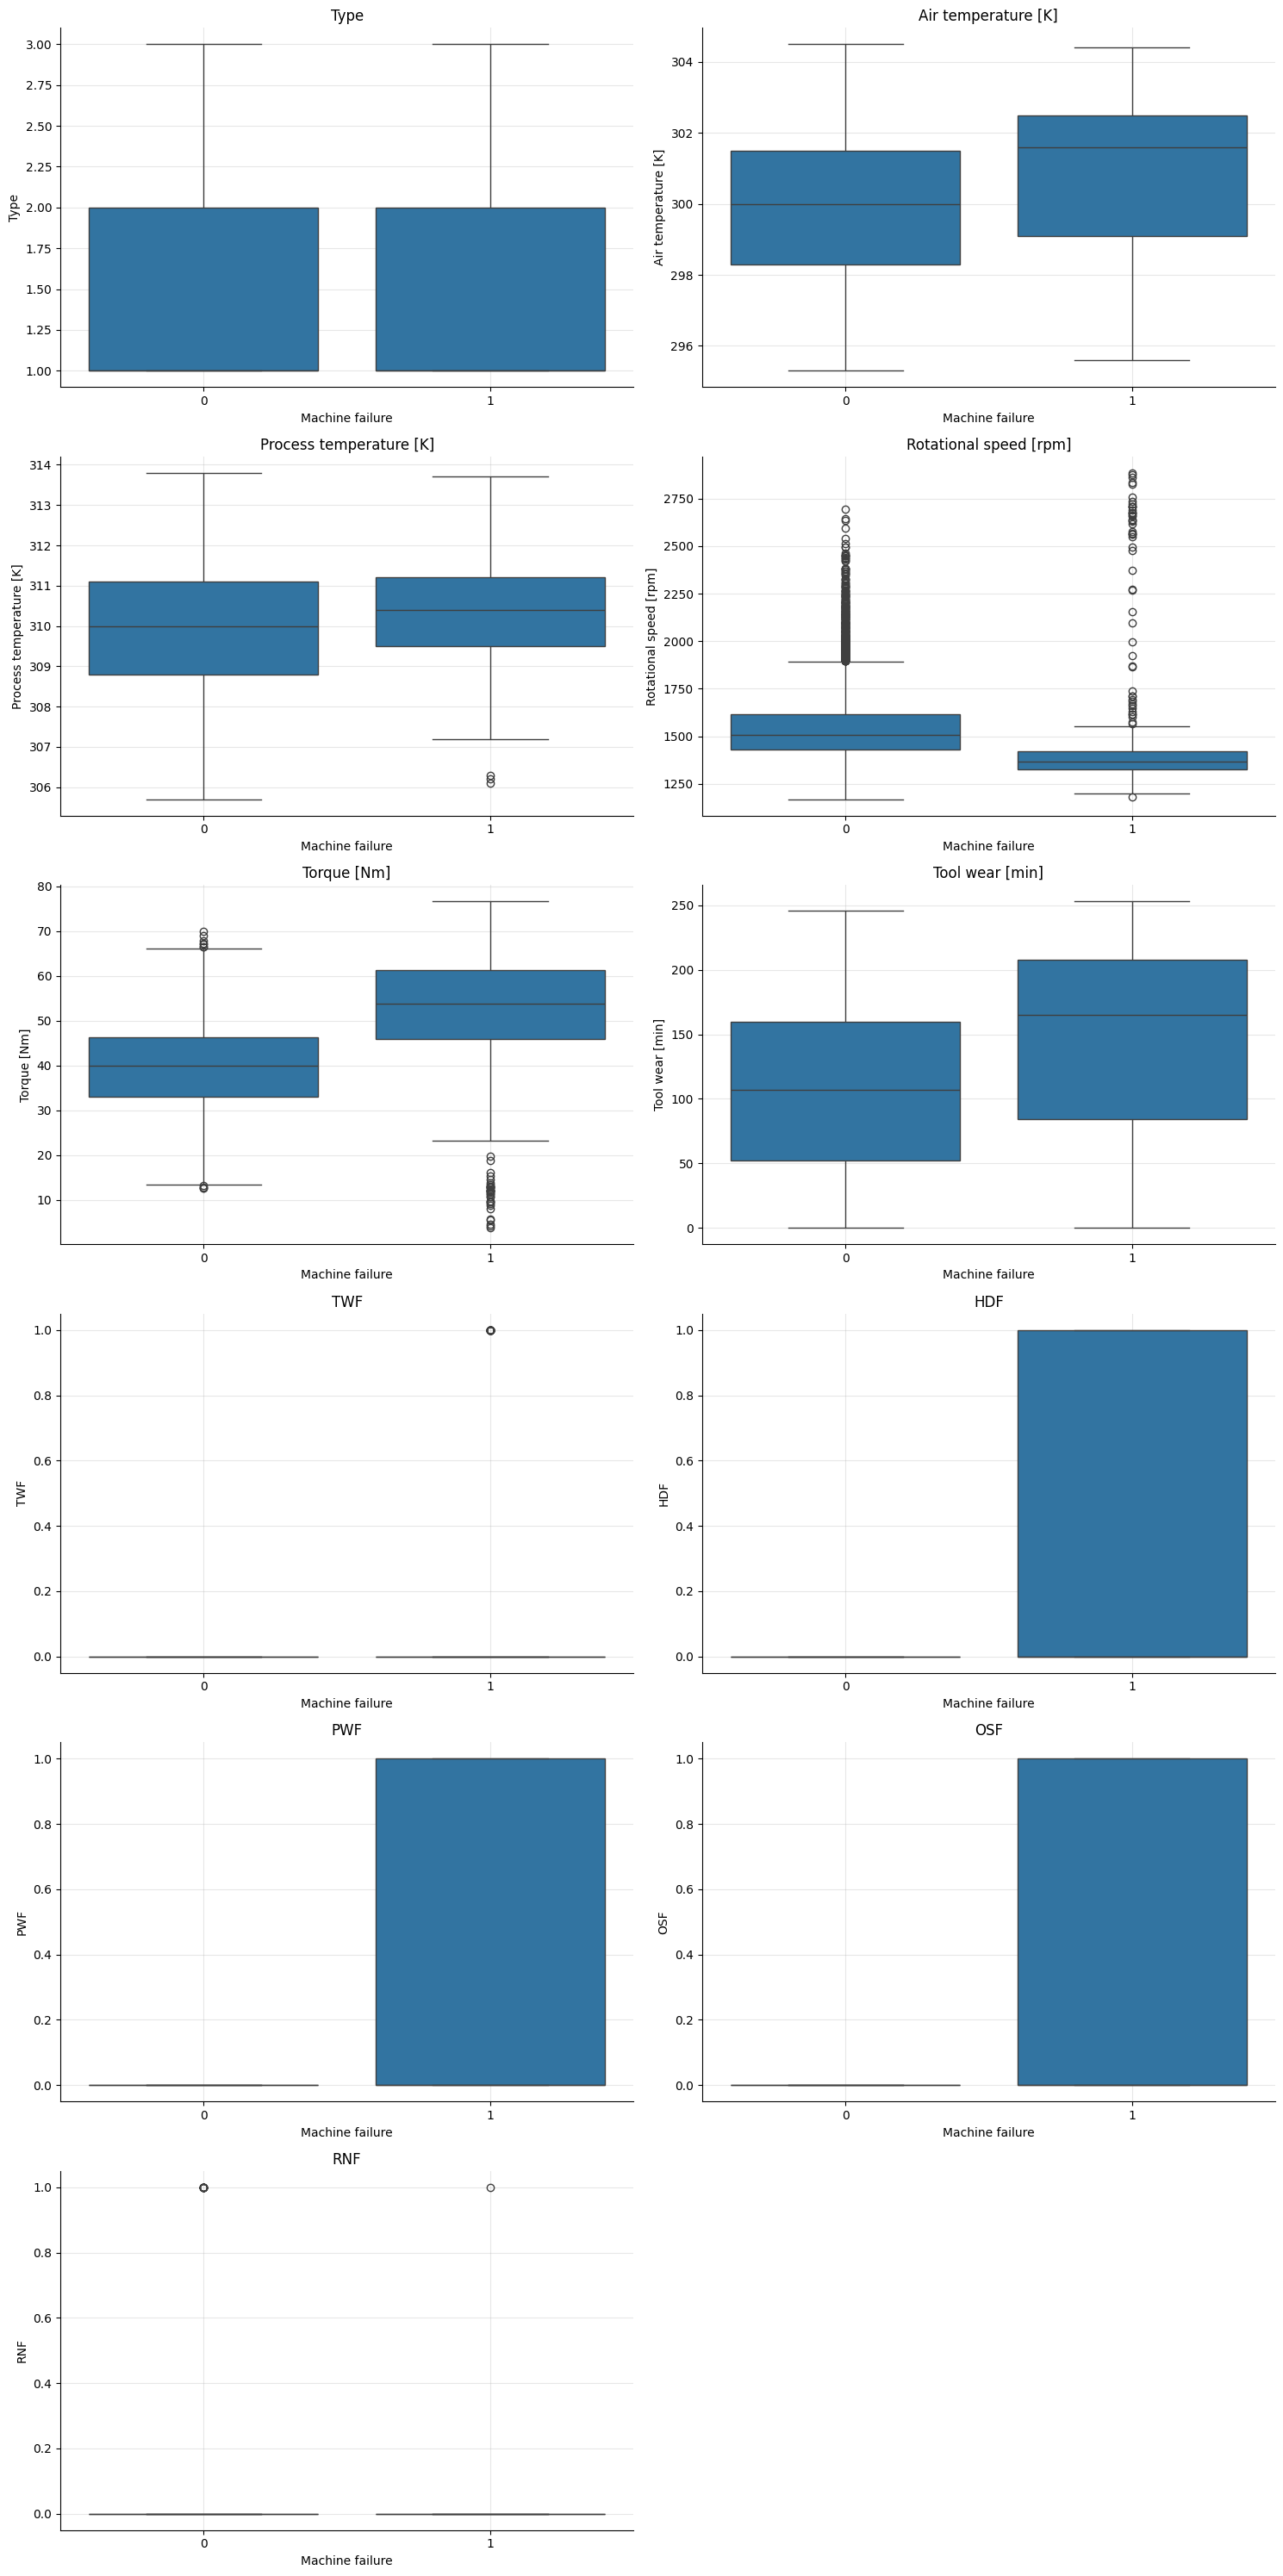

In [ ]:


# Filtrar colunas excluindo 'UDI'
colunas = [col for col in df.columns if col != 'Machine failure']

# Calcular número de linhas dinamicamente
n_linhas = (len(colunas) + 2) // 2  # Arredondamento para cima

# Criar a grade de subplots
fig, axes = plt.subplots(n_linhas, 2, figsize=(15, 5*n_linhas))
ax = axes.flatten()  # Transforma a matriz de eixos em uma lista plana

# Loop pelas colunas
for i, column in enumerate(colunas):
    # Plotar no subplot correspondente
    sns.boxplot(x='Machine failure', y=column, data=df, ax=ax[i])
    ax[i].set_title(column, fontsize=12)
    ax[i].grid(alpha=0.3)
    ax[i].set_title(column, fontsize=12)
    ax[i].grid(alpha=0.3)

    # Remover bordas desnecessárias
    ax[i].spines[['top', 'right']].set_visible(False)

# Esconder eixos vazios restantes
for j in range(len(colunas), len(ax)):
    ax[j].set_visible(False)

# Ajustar layout
plt.tight_layout()
plt.show()


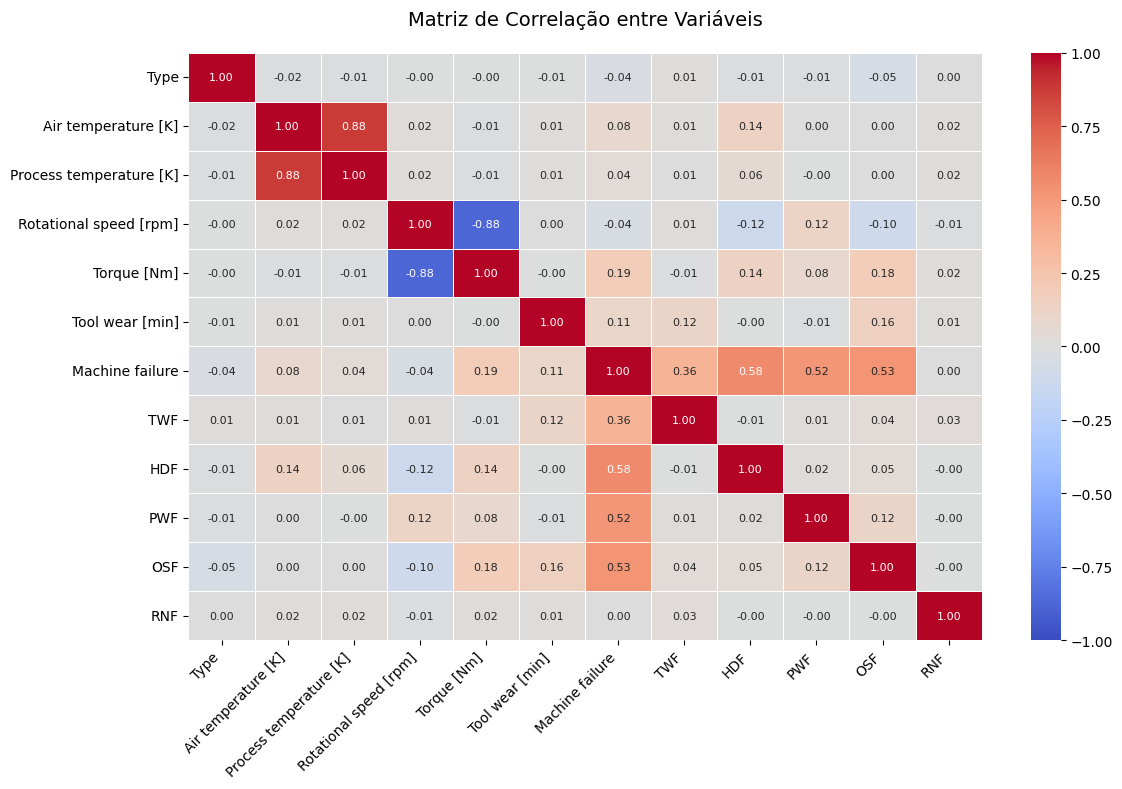

In [ ]:
plt.figure(figsize=(12, 8))  # Tamanho do gráfico

# Heatmap com formatação
sns.heatmap(
    df.corr(),
    annot=True,
    cmap='coolwarm',
    fmt='.2f',  # Duas casas decimais
    linewidths=0.5,
    linecolor='white',
    vmin=-1,
    vmax=1,
    annot_kws={'size': 8}
)

# Ajustes finais
plt.title('Matriz de Correlação entre Variáveis', pad=20, fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotacionar labels do eixo X
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  int64  
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
 7   TWF                      10000 non-null  int64  
 8   HDF                      10000 non-null  int64  
 9   PWF                      10000 non-null  int64  
 10  OSF                      10000 non-null  int64  
 11  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 937.6 KB


Com base neste análise inicial vamos realizar a remoção dos seguintes dados

  - Type : Baixa correlação com nossa variavel alvo
  - Rotational Speed : Baixa correlação com nossa variavel alvo
   

In [ ]:
# Vamos realizar a remocao das variaveis Type, Rotational speed [rpm]
df.drop(columns=['Type', 'Rotational speed [rpm]'], inplace=True)

In [ ]:
# Dados Atuais
df.sample(10)

,Air temperature [K],Process temperature [K],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
560,297.5,309.4,58.2,146,0,0,0,0,0,0
5849,301.4,311.2,47.6,52,0,0,0,0,0,0
542,297.5,309.4,24.7,98,0,0,0,0,0,0
1262,297.8,309.2,33.0,29,0,0,0,0,0,0
9880,298.8,309.8,27.5,130,0,0,0,0,0,0
7857,300.5,311.9,43.1,16,0,0,0,0,0,0
1214,296.8,307.8,33.0,115,0,0,0,0,0,0
401,297.5,308.5,30.4,178,0,0,0,0,0,0
3084,300.1,309.4,55.2,143,0,0,0,0,0,0
9768,298.6,309.6,35.7,23,0,0,0,0,0,0


## Predição


In [ ]:
# Vamos dividir nossos dados em treino e teste e realizar uma treino de modelo
from sklearn.model_selection import train_test_split


X = df[['Air temperature [K]', 'Torque [Nm]', 'Tool wear [min]', 'Process temperature [K]']]
y = df['Machine failure']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42 , stratify=y )
print(f'Base de Treinamento: {X_train.shape}')
print(f'Base de Teste: {X_test.shape}')

from imblearn.over_sampling import SMOTE

# Cria amostras sintéticas da classe minoritária (Machine failure = 1)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


Base de Treinamento: (3000, 4)
Base de Teste: (7000, 4)


In [ ]:
#Verificando a aplicação de SMOTE
print("\n=== Distribuição das Classes ===")
print(f"Treino original - Classe 0: {(y_train == 0).sum()}, Classe 1: {(y_train == 1).sum()}")
print(f"Treino após SMOTE - Classe 0: {(y_train_res == 0).sum()}, Classe 1: {(y_train_res == 1).sum()}")
print(f"Teste - Classe 0: {(y_test == 0).sum()}, Classe 1: {(y_test == 1).sum()}")


=== Distribuição das Classes ===
Treino original - Classe 0: 2898, Classe 1: 102
Treino após SMOTE - Classe 0: 2898, Classe 1: 2898
Teste - Classe 0: 6763, Classe 1: 237


In [ ]:
# Vamos modar alguns modelos e ver qual sai melhor para nossa predicao
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler



# Modelos
modelo_1 = LogisticRegression()
modelo_2 = GradientBoostingClassifier()
modelo_3 = DecisionTreeClassifier()
modelo_4= RandomForestClassifier()
modelo_5 = KNeighborsClassifier()
modelo_6 = AdaBoostClassifier()



modelos = [modelo_1, modelo_2, modelo_3, modelo_4, modelo_5,modelo_6]

# Treinando os modelos
for modelo in modelos:
    modelo.fit(X_train_res, y_train_res)


In [ ]:
# Vamos avaliar as métricas dos nossos modelos

from sklearn.metrics import accuracy_score,recall_score, precision_score,f1_score, classification_report, confusion_matrix,roc_auc_score

for modelo in modelos:
    y_pred = modelo.predict(X_test)
    print(f"Modelo: {modelo.__class__.__name__}")
    print("")
    print(f"Acurácia: {accuracy_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"Precisão: {precision_score(y_test, y_pred)}")
    print(f"F1-Score: {f1_score(y_test, y_pred)}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred)}")
    print("")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("")

Modelo: LogisticRegression

Acurácia: 0.752
Recall: 0.7805907172995781
Precisão: 0.09898341359015517
F1-Score: 0.17568850902184235
ROC AUC: 0.7657943975378566

              precision    recall  f1-score   support

           0       0.99      0.75      0.85      6763
           1       0.10      0.78      0.18       237

    accuracy                           0.75      7000
   macro avg       0.54      0.77      0.51      7000
weighted avg       0.96      0.75      0.83      7000

[[5079 1684]
 [  52  185]]

Modelo: GradientBoostingClassifier

Acurácia: 0.9154285714285715
Recall: 0.7510548523206751
Precisão: 0.25035161744022505
F1-Score: 0.3755274261603376
ROC AUC: 0.8361218369247913

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      6763
           1       0.25      0.75      0.38       237

    accuracy                           0.92      7000
   macro avg       0.62      0.84      0.67      7000
weighted avg       0.97      0.92

De todos os modelos avaliados o que teve melhor resposta foi GradientBoostingClassifier portanto vamos utilizar para nossa predição final

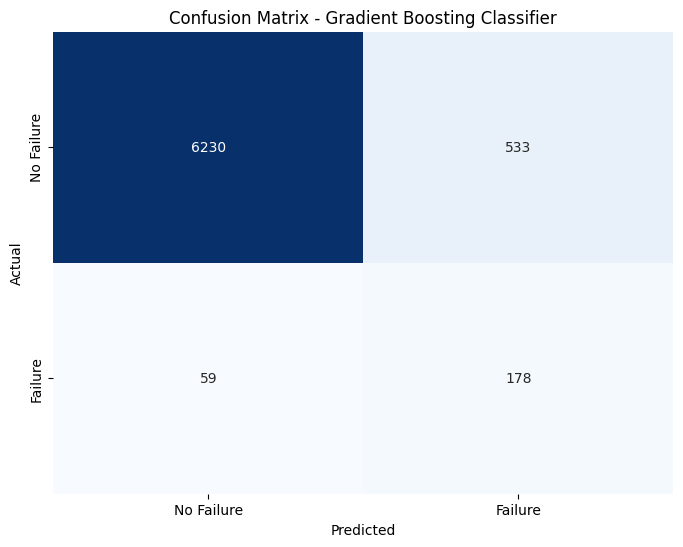

In [ ]:
# Previsões do modelo
y_pred = modelo_2.predict(X_test)

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Failure', 'Failure'],
            yticklabels=['No Failure', 'Failure'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting Classifier')
plt.show()